In [1]:
# Loading all the libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

# Plotting Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy.stats import norm 

# ML models libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 

In [2]:
# Importing our utility module
import capstone_group10 as utility

# Reading the File

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/374/appliances+energy+prediction.zip")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# Columns of the dataset
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Features
- Date time stamp	year-month-day (hour:min:s)
- Appliances energy consumption	Wh	
- Light energy consumption	Wh	
- T1, Temperature in kitchen area	°C	
- RH1, Humidity in kitchen area	%	
- T2, Temperature in living room area	°C	
- RH2, Humidity in living room area	%	
- T3, Temperature in laundry room area	°C	
- RH3, Humidity in laundry room area	%	
- T4, Temperature in office room	°C	
- RH4, Humidity in office room	%	
- T5, Temperature in bathroom	°C	
- RH5, Humidity in bathroom	%	
- T6, Temperature outside the building (north side)	°C	
- RH6, Humidity outside the building (north side)	%	
- T7, Temperature in ironing room	°C	
- RH7, Humidity in ironing room	%	
- T8, Temperature in teenager room 2	°C
- RH8, Humidity in teenager room 2	%	
- T9, Temperature in parents room	°C	
- RH9, Humidity in parents room	%	
- To, Temperature outside (from Chièvres weather station)	°C	
- Pressure (from Chièvres weather station)	mm Hg	
- RHo, Humidity outside (from Chièvres weather station)	%	
- Windspeed (from Chièvres weather station)	m/s	
- Visibility (from Chièvres weather station)	km	
- Tdewpoint (from Chièvres weather station)	°C	
- Random Variable 1 (RV_1)	Non dimensional	
- Random Variable 2 (RV_2)	Non dimensional	

# Data Cleaning

In [5]:
# Before cleaning, we keep the clean data in a seperate dataframe

df_clean = df.copy() # Copy makes sure that any actions on the df_clean is not reflected on the main dataframe

1. Converting Date Column:

In [6]:
# Convert the date column into a datetime object
df_clean['date'] = pd.to_datetime(df_clean['date'])

2. Splitting Date Column:

In [7]:
# Split into day and month columns
df_clean['day'] = df_clean['date'].dt.day
df_clean['month'] = df_clean['date'].dt.month
# Skipping year since the data is from the same year 
df_clean[['date','day','month']].head()

,date,day,month
0,2016-01-11 17:00:00,11,1
1,2016-01-11 17:10:00,11,1
2,2016-01-11 17:20:00,11,1
3,2016-01-11 17:30:00,11,1
4,2016-01-11 17:40:00,11,1


3. Separating Time:

In [8]:
# Seperating time from datetime stamp into a seperate column
df_clean['time'] = df_clean['date'].dt.time
df_clean[['date','time']].head()

,date,time
0,2016-01-11 17:00:00,17:00:00
1,2016-01-11 17:10:00,17:10:00
2,2016-01-11 17:20:00,17:20:00
3,2016-01-11 17:30:00,17:30:00
4,2016-01-11 17:40:00,17:40:00


4. Time Column Transformation:

In [9]:
# Convert the time column into a datetime format
df_clean['time'] = pd.to_datetime(df_clean['time'], format='%H:%M:%S')

# Split into hour and minute columns
df_clean['hour'] = df_clean['time'].dt.hour
df_clean['minute'] = df_clean['time'].dt.minute
df_clean[['time','hour','minute']].head()

,time,hour,minute
0,1900-01-01 17:00:00,17,0
1,1900-01-01 17:10:00,17,10
2,1900-01-01 17:20:00,17,20
3,1900-01-01 17:30:00,17,30
4,1900-01-01 17:40:00,17,40


5. Calculating Total Energy Consumption:

In [10]:
# Calculate the total by summing the 2 columns together
df_clean['total'] = df_clean['Appliances'] + df_clean['lights']
df_clean[['total','Appliances','lights']].head()

,total,Appliances,lights
0,90,60,30
1,90,60,30
2,80,50,30
3,90,50,40
4,100,60,40


6. Dropping Redundant Columns:


In [11]:
# Let's drop the unnecessary columns
df_clean.drop(['date','time','Appliances','lights'], axis=1, inplace=True)
df_clean.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'day', 'month', 'hour', 'minute', 'total'],
      dtype='object')

7. Dropping Uninformative Columns:

In [12]:
# Columns such as rv1, rv2 are uniformative as we have no information regarding what it signifies

df_clean.drop(['rv1','rv2'],axis=1,inplace=True)
df_clean.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'day',
       'month', 'hour', 'minute', 'total'],
      dtype='object')

8. Creation of Daily Data Subset:

In [13]:
df_clean

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,hour,minute,total
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,733.5,92.000000,7.000000,63.000000,5.300000,11,1,17,0,90
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,733.6,92.000000,6.666667,59.166667,5.200000,11,1,17,10,90
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,733.7,92.000000,6.333333,55.333333,5.100000,11,1,17,20,80
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,733.8,92.000000,6.000000,51.500000,5.000000,11,1,17,30,90
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,733.9,92.000000,5.666667,47.666667,4.900000,11,1,17,40,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,755.2,55.666667,3.333333,23.666667,13.333333,27,5,17,20,100
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,755.2,56.000000,3.500000,24.500000,13.300000,27,5,17,30,90
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,755.2,56.333333,3.666667,25.333333,13.266667,27,5,17,40,280
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,755.2,56.666667,3.833333,26.166667,13.233333,27,5,17,50,430


In [14]:
# A subset dataset for day-to-day energy consumption data
df_per_day = df[['date','Appliances','lights']]
df_per_day['date'] = pd.to_datetime(df_per_day['date'])
df_per_day['date'] = df_per_day['date'].dt.strftime("%d-%b-%y")
df_per_day =  df_per_day.groupby('date')[['Appliances','lights']].sum()
df_per_day['Total'] = df_per_day['Appliances'] + df_per_day['lights']
df_per_day.reset_index(inplace=True)

# Let's arrange it based on date (in ascending order)
df_per_day.sort_values(by='date',inplace=True)
df_per_day.head()

,date,Appliances,lights,Total
0,01-Apr-16,8580,10,8590
1,01-Feb-16,22450,2180,24630
2,01-Mar-16,10420,720,11140
3,01-May-16,14090,30,14120
4,02-Apr-16,7300,0,7300


9. Additional Day-of-Week Column:

In [15]:
# Based on the date identify the day of the week
df_per_day['day_of_week'] = pd.to_datetime(df_per_day['date']).dt.weekday

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_dow =  df_per_day.groupby('day_of_week')[['Appliances','lights']].mean()
df_dow['Total'] = df_dow['Appliances'] + df_dow['lights']
df_dow.reset_index(inplace=True)
df_dow['day_of_week'] = days
df_dow.head()

,day_of_week,Appliances,lights,Total
0,Monday,15480.5,818.5,16299.0
1,Tuesday,12546.0,578.0,13124.0
2,Wednesday,12950.0,602.0,13552.0
3,Thursday,13022.5,588.0,13610.5
4,Friday,14882.5,305.0,15187.5


# Outlier Analysis

[Text(0.5, 1.0, 'Temperatue at Bathroom'), Text(0.5, 0, 'Temperature (C)')]

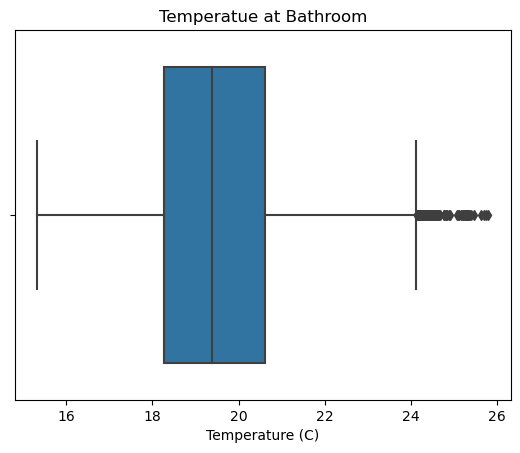

In [16]:
# We compared for all the variables. We use this example to explain our outlier analysis detection
sns.boxplot(x=df_clean['T5']).set(title='Temperatue at Bathroom',xlabel='Temperature (C)')

[Text(0.5, 1.0, 'Relative Humidity at Bathroom'),
 Text(0.5, 0, 'Relative Humidity')]

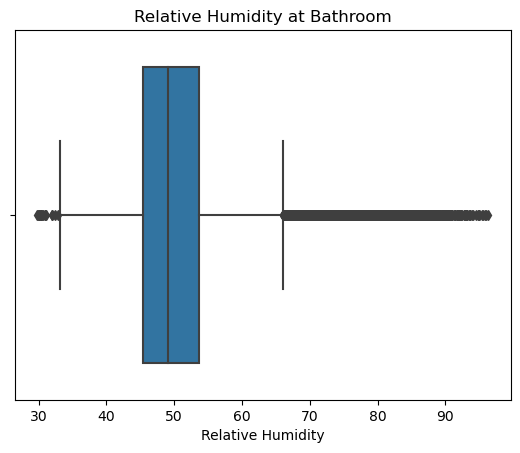

In [17]:
sns.boxplot(x=df_clean['RH_5']).set(title='Relative Humidity at Bathroom',xlabel='Relative Humidity')

The visualizations highlight numerous outliers, but on closer examination, such as comparing attributes like T5 and RH_5, provides meaningful context. Taking the example of temperature (T5) and relative humidity (RH_5) recorded from the bathroom, outliers with a temperature above 24°C 
and relative humidity above 60% are deemed reasonable. Recognizing that these instances fall within a specific category, it was decided not to remove these outliers, as they contribute valuable insights to the dataset.

# Missing Value Analysis

In [18]:
# If there are no missing values we get False, if not True
any(df.isnull().any() == True)

False

# Check for Duplicates

In [19]:
# If there are no duplicate rows we get False, if not True
any(df.duplicated() == True)

False

Since, our data is collected from sensors - highly rare to find any missing value or duplicates

# Statistical Descriptive Analysis

In [20]:
# Descriptive Statistics for every 10 mins
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [21]:
# Descriptive Statistics for every single day
df_per_day.describe().iloc[:,:3]

,Appliances,lights,Total
count,138.000000,138.000000,138.000000
mean,13971.086957,543.695652,14514.782609
std,4393.151220,457.535569,4531.328613
min,5400.000000,0.000000,5400.000000
25%,10812.500000,172.500000,11537.500000
50%,13255.000000,450.000000,13920.000000
75%,16020.000000,777.500000,16272.500000
max,27150.000000,2180.000000,27690.000000


# Data Visualizations

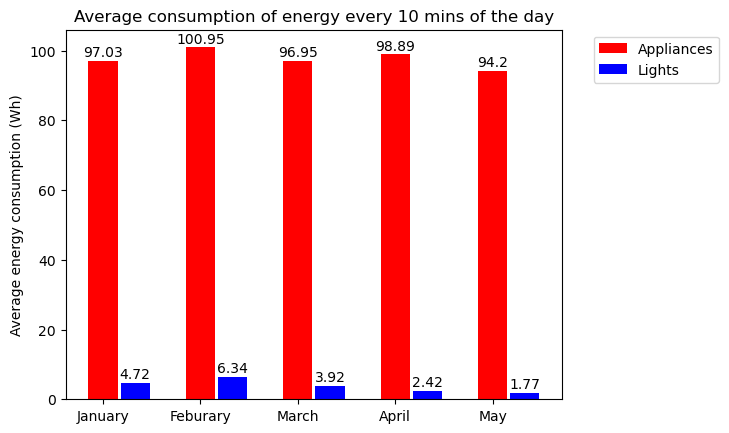

In [22]:
# Average consumption of electricity for every 10 mins in the months 

# Data Preparation for Plot
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
monthly_energy_consumption = df.groupby('month')[['Appliances','lights']].mean()

# Plot
months = ['January','Feburary','March','April','May']
fig, ax = plt.subplots()
x = np.arange(len(months))
multiplier = 0
color = 'red'
for labels, values in monthly_energy_consumption.items():
    offset = 0.3 * multiplier
    bars = ax.bar(x + offset, round(values,2), width=0.3, color=color, label=labels)
    ax.bar_label(bars, padding=1)
    multiplier += 1.1
    color = 'blue' #In order to change the color of bars for second bar plots

plt.legend(labels=['Appliances','Lights'],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Average consumption of energy every 10 mins of the day")
ax.set_ylabel('Average energy consumption (Wh)')
ax.set_xticks([0,1,2,3,4],months)
plt.show()

To gain even more valuable insights, we plan to use the aggregated data of per-day energy consumption. We have already created the required aggregated data subset as part of our data cleaning process. This allows us to gain a better understanding of the daily energy consumption in 
the given house.


# Power Consumption per day and comparative analysis

In [23]:
# Total Power Consumption Per Day
fig = px.line(df_per_day, x='date', y='Total',title="Total Power Consumption Per Day")
fig.show()

Analyzing the daily total energy consumption helped us reveal interesting insights such as January 28th has the minimum energy usage and April 4th recorded the maximum consumption. This insight sheds light on significant variations in energy demands on specific days.

Comparative analysis of average day energy consumption data, using March 15 as a reference as the electricity consumption is almost equal to the mean electricity consumption value, helps understand factors driving extreme energy consumption on specific dates, providing insights into distinct characteristics.

In [24]:
# From the above graph we identify the date with least electricity consumption is Jan 28th and Highest consumption is Apr 4th

df['Total'] = df['Appliances'] + df['lights']

fig = px.line(df[(df['month']==1)&(df['day']==28)], x='date', y=['Total'],title="Power Consumption on Jan 28th")
fig.show()

fig = px.line(df[(df['month']==4)&(df['day']==4)], x='date', y=['Total'],title="Power Consumption on Apr 4th")
fig.show()

# A day which is close to the mean value 
fig = px.line(df[(df['month']==3)&(df['day']==15)], x='date', y=['Total'],title="Power Consumption on Mar 15th")
fig.show()

Detailed comparison analysis has been written in the report

# Weekly Power Consumption Analysis

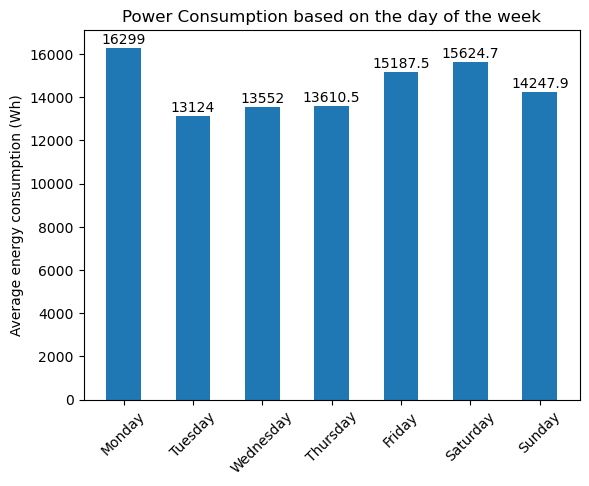

In [25]:
fig, ax = plt.subplots()

bars = ax.bar(df_dow['day_of_week'], round(df_dow['Total'],2), width=0.5)
ax.bar_label(bars, padding=1)
plt.title("Power Consumption based on the day of the week")
ax.set_ylabel('Average energy consumption (Wh)')
ax.set_xticks([0,1,2,3,4,5,6],days,rotation=45)
plt.show()
plt.show()

In [26]:
# Descriptive Statistics of the Weekly Data
week_stats = df_per_day.groupby('day_of_week')[['Total']].describe()
week_stats.index = days
week_stats

Total                                                                \
          count          mean          std     min      25%      50%      75%   
Monday     20.0  16299.000000  5850.512258  7000.0  12022.5  14295.0  21490.0   
Tuesday    20.0  13124.000000  3282.676059  9550.0  10765.0  12665.0  14310.0   
Wednesday  20.0  13552.000000  3695.347858  6660.0  11815.0  13140.0  14232.5   
Thursday   20.0  13610.500000  4087.671419  5400.0  11032.5  12975.0  14662.5   
Friday     20.0  15187.500000  5950.745973  6680.0   9930.0  14800.0  19002.5   
Saturday   19.0  15624.736842  3572.262539  7300.0  14075.0  15040.0  17870.0   
Sunday     19.0  14247.894737  4132.690244  7810.0  10695.0  14120.0  16150.0   

                    
               max  
Monday     27690.0  
Tuesday    22810.0  
Wednesday  24050.0  
Thursday   22520.0  
Friday     26260.0  
Saturday   23500.0  
Sunday     23070.0

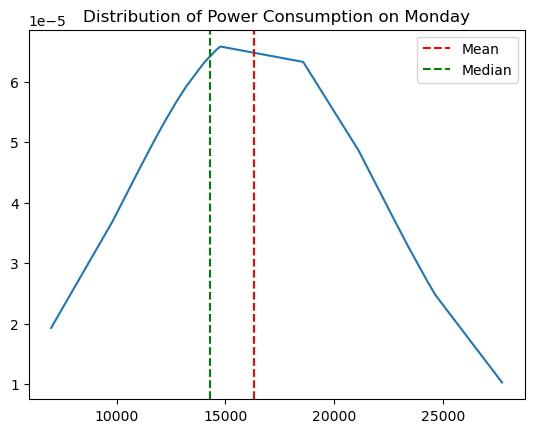

In [27]:
# Distribution 

x_axis = df_per_day[df_per_day['day_of_week'] == 0]['Total'].sort_values().values

mean_mon = week_stats[week_stats.index=="Monday"].mean()[1]
median_mon = week_stats[week_stats.index=="Monday"].mean()[5]
x = df_per_day.groupby('day_of_week')[['Total']].std()
sd_mon = x[x.index==0]['Total'][0]

  
plt.plot(x_axis, norm.pdf(x_axis, mean_mon, sd_mon)) 
line1 = plt.axvline(mean_mon,color='red', linestyle = 'dashed')
line2 = plt.axvline(median_mon, color = 'green', linestyle = 'dashed')
plt.legend([line1,line2],['Mean','Median'])
plt.title("Distribution of Power Consumption on Monday")
plt.show() 

Detailed report written in our report

# Correlation Analysis

<Figure size 1400x1200 with 0 Axes>

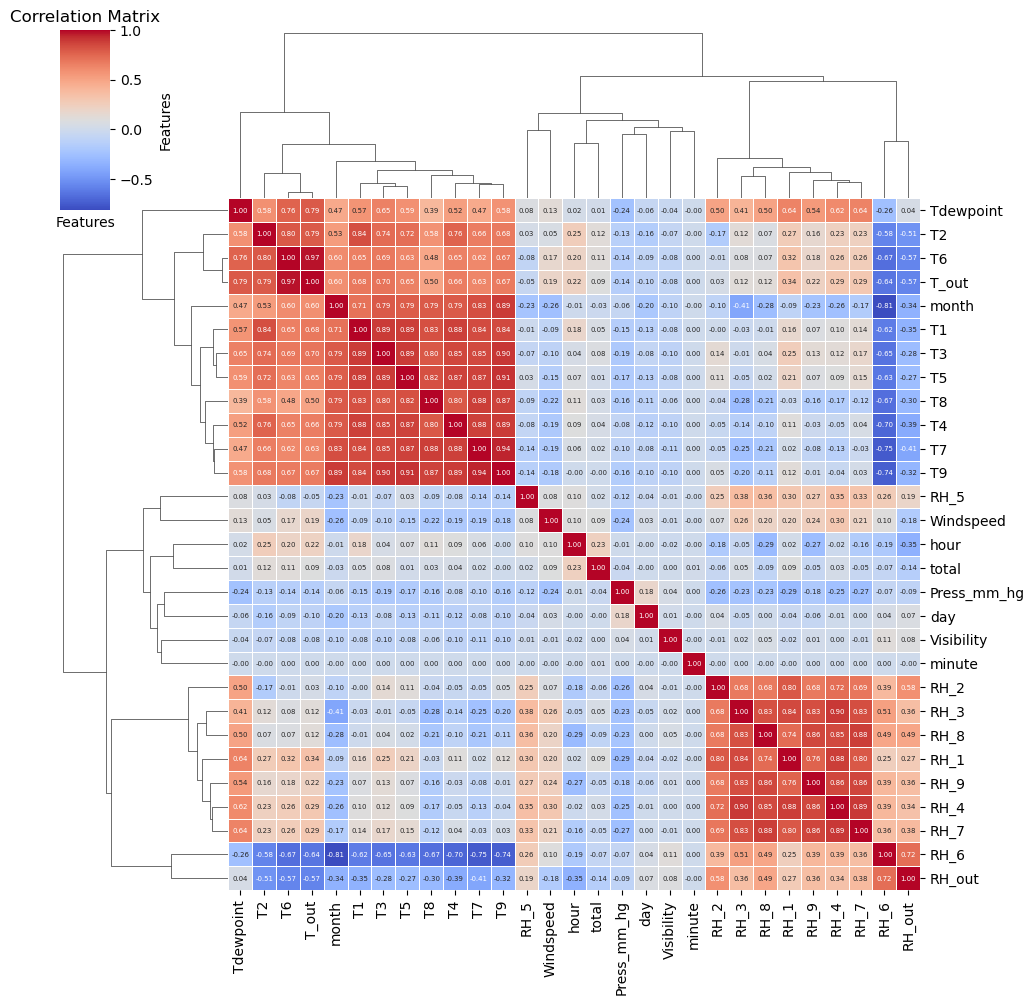

C:\Users\LEGION\AppData\Local\Temp\ipykernel_17256\3933335353.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



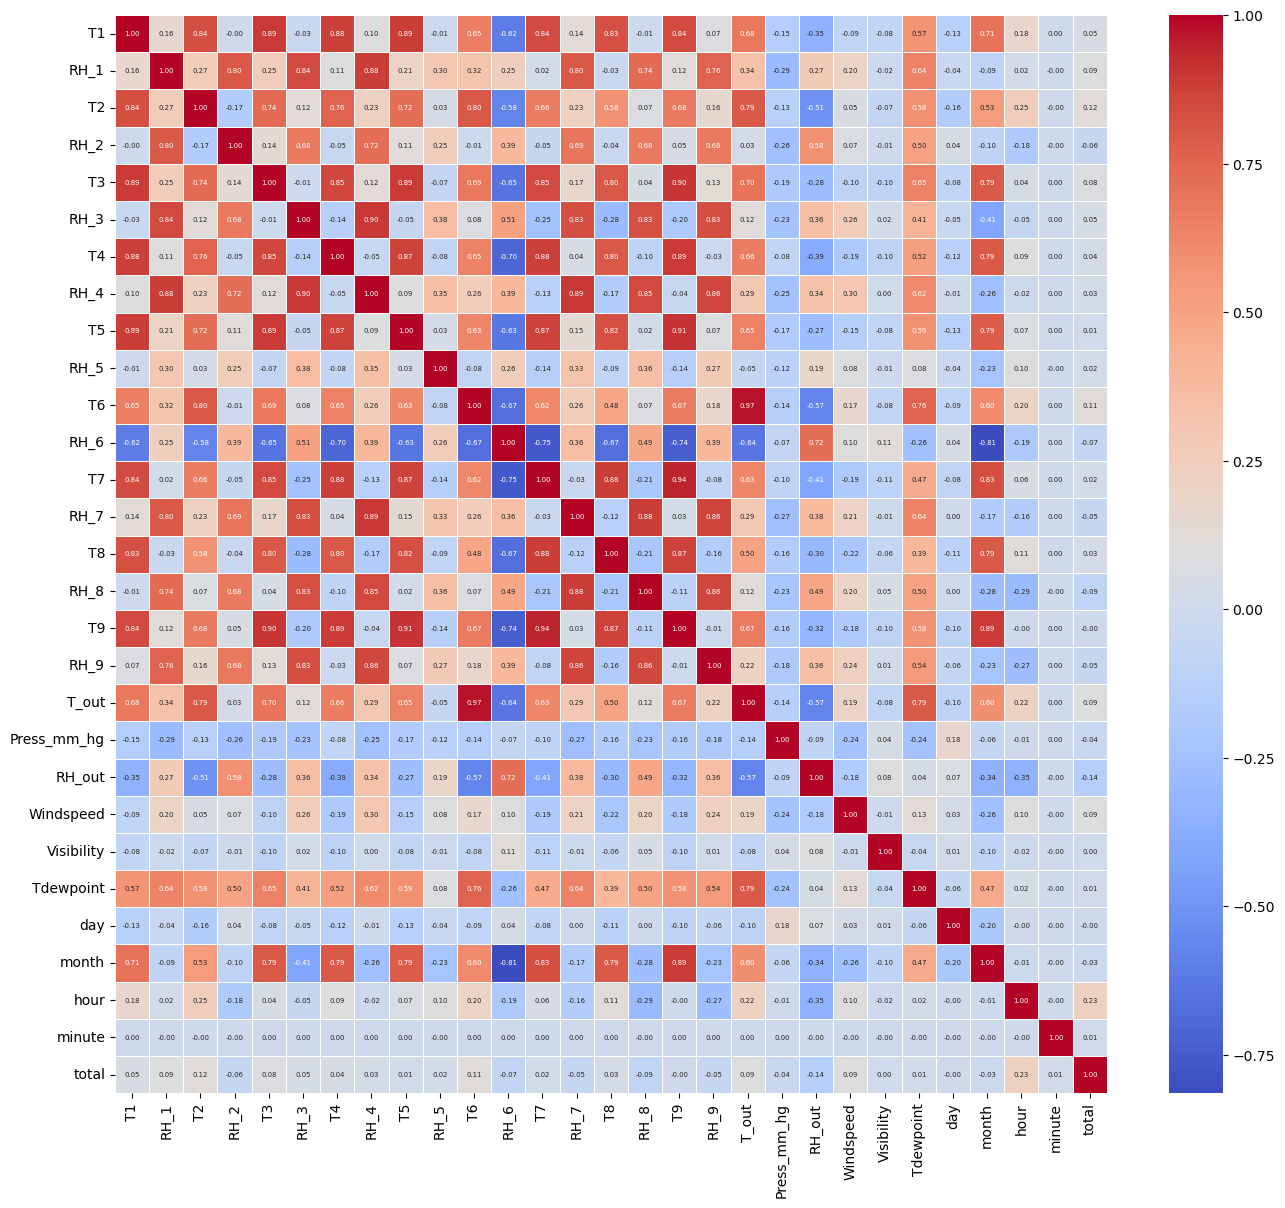

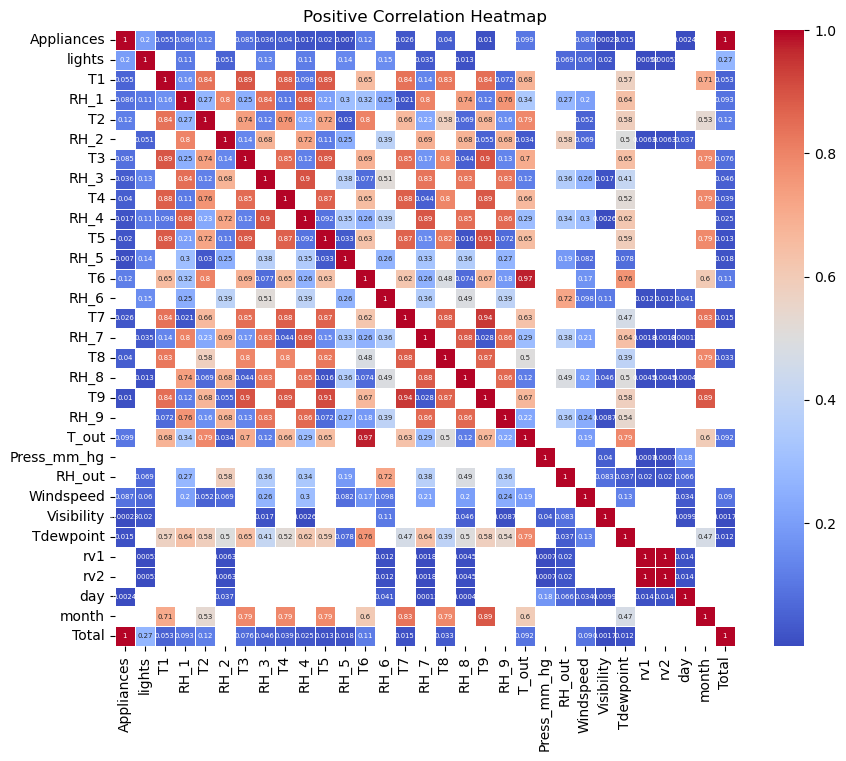

In [28]:
corr_matrix = df_clean.corr(numeric_only=True)

plt.figure(figsize=(14, 12))
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 5})

plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Display the plot
plt.show()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
correlation_matrix = df.corr()

# Find positive correlations (values between 0 and 1)
positive_correlations = correlation_matrix.where(correlation_matrix > 0)

# Create a heatmap of positive correlations
plt.figure(figsize=(10, 8))
sns.heatmap(positive_correlations, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 5})
plt.title('Positive Correlation Heatmap')
plt.show()


# Predictive Models

Train-Test split 

In [42]:
# X and y split
X = df_clean.drop('total', axis=1)
y = df_clean['total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Display the size of train-test split
pd.DataFrame({'Training Data':[len(X_train)],'Testing Data':[len(X_test)]})

,Training Data,Testing Data
0,15788,3947


# Linear Regression

In [30]:
results_lr = pd.DataFrame(columns = ['Model','Mean Absolute Error','R2 Score'])

# Linear Regression
model = utility.model_training('Linear Regression',X_train,y_train)
print(model)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_lr = pd.concat([pd.DataFrame([['Linear Regression',mae,r2_score]], columns=results_lr.columns), results_lr], ignore_index=True)

# Lasso Regression
model = utility.model_training('Lasso',X_train,y_train)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_lr = pd.concat([pd.DataFrame([['Lasso Regression',mae,r2_score]], columns=results_lr.columns), results_lr], ignore_index=True)

# Ridge Regression
model = utility.model_training('Ridge',X_train,y_train)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_lr = pd.concat([pd.DataFrame([['Ridge Regression',mae,r2_score]], columns=results_lr.columns), results_lr], ignore_index=True)

results_lr

LinearRegression()


,Model,Mean Absolute Error,R2 Score
0,Ridge Regression,54.685153,0.158291
1,Lasso Regression,54.346092,0.155320
2,Linear Regression,54.685677,0.158289


# SVM (Support Vector Machines)

In [31]:
results_svm = pd.DataFrame(columns = ['Model','Mean Absolute Error','R2 Score'])

# SVM Linear Kernel
model = utility.model_training('SVM',X_train,y_train,params='linear')
mae,r2_score = utility.test_model(model,X_test,y_test)
results_svm = pd.concat([pd.DataFrame([['Linear Kernel',mae,r2_score]], columns=results_svm.columns), results_svm], ignore_index=True)

# SVM Poly Kernel
model = utility.model_training('SVM',X_train,y_train,params='poly')
mae,r2_score = utility.test_model(model,X_test,y_test)
results_svm = pd.concat([pd.DataFrame([['Poly Kernel',mae,r2_score]], columns=results_svm.columns), results_svm], ignore_index=True)

# SVM RBF Kernel
model = utility.model_training('SVM',X_train,y_train,params='rbf')
mae,r2_score = utility.test_model(model,X_test,y_test)
results_svm = pd.concat([pd.DataFrame([['RBF Kernel',mae,r2_score]], columns=results_svm.columns), results_svm], ignore_index=True)

# SVM Sigmoid Kernel
model = utility.model_training('SVM',X_train,y_train,params='sigmoid')
mae,r2_score = utility.test_model(model,X_test,y_test)
results_svm = pd.concat([pd.DataFrame([['Sigmoid Kernel',mae,r2_score]], columns=results_svm.columns), results_svm], ignore_index=True)

results_svm

,Model,Mean Absolute Error,R2 Score
0,Sigmoid Kernel,51.609363,-0.133089
1,RBF Kernel,50.588507,-0.105709
2,Poly Kernel,49.965828,-0.093390
3,Linear Kernel,45.058394,0.049292


# Random Forest

In [32]:
results_rf = pd.DataFrame(columns = ['Model','Mean Absolute Error','R2 Score'])

# n_estimators = 10
model = utility.model_training('Random Forest',X_train,y_train,params=10)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_rf = pd.concat([pd.DataFrame([['10',mae,r2_score]], columns=results_rf.columns), results_rf], ignore_index=True)

# n_estimators = 50
model = utility.model_training('Random Forest',X_train,y_train,params=50)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_rf = pd.concat([pd.DataFrame([['50',mae,r2_score]], columns=results_rf.columns), results_rf], ignore_index=True)

# n_estimators = 100
model = utility.model_training('Random Forest',X_train,y_train,params=100)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_rf = pd.concat([pd.DataFrame([['100',mae,r2_score]], columns=results_rf.columns), results_rf], ignore_index=True)

# n_estimators = 200
model = utility.model_training('Random Forest',X_train,y_train,params=200)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_rf = pd.concat([pd.DataFrame([['200',mae,r2_score]], columns=results_rf.columns), results_rf], ignore_index=True)

results_rf

,Model,Mean Absolute Error,R2 Score
0,200,30.062516,0.618748
1,100,30.004535,0.617125
2,50,30.219559,0.614168
3,10,31.884723,0.569024


# XGBoost

In [33]:
results_xgb = pd.DataFrame(columns = ['Model','Mean Absolute Error','R2 Score'])

# Booster = dart

# n_estimators = 10
model = utility.model_training('XGBoost',X_train,y_train,params=['dart',10])
mae,r2_score = utility.test_model(model,X_test,y_test)
results_xgb = pd.concat([pd.DataFrame([['10',mae,r2_score]], columns=results_xgb.columns), results_xgb], ignore_index=True)

# n_estimators = 100
model = utility.model_training('XGBoost',X_train,y_train,params=['dart',100])
mae,r2_score = utility.test_model(model,X_test,y_test)
results_xgb = pd.concat([pd.DataFrame([['50',mae,r2_score]], columns=results_xgb.columns), results_xgb], ignore_index=True)

# n_estimators = 200
model = utility.model_training('XGBoost',X_train,y_train,params=['dart',200])
mae,r2_score = utility.test_model(model,X_test,y_test)
results_xgb = pd.concat([pd.DataFrame([['100',mae,r2_score]], columns=results_xgb.columns), results_xgb], ignore_index=True)

# n_estimators = 500
model = utility.model_training('XGBoost',X_train,y_train,params=['dart',500])
mae,r2_score = utility.test_model(model,X_test,y_test)
results_xgb = pd.concat([pd.DataFrame([['500',mae,r2_score]], columns=results_xgb.columns), results_xgb], ignore_index=True)

# Booster = gbline
model = utility.model_training('XGBoost',X_train,y_train,params=['gblinear',100])
mae,r2_score = utility.test_model(model,X_test,y_test)
results_xgb = pd.concat([pd.DataFrame([['Gbline - 100',mae,r2_score]], columns=results_xgb.columns), results_xgb], ignore_index=True)

results_xgb

,Model,Mean Absolute Error,R2 Score
0,Gbline - 100,49.275354,-0.074013
1,500,32.432244,0.448573
2,100,33.225327,0.403394
3,50,34.202986,0.359625
4,10,40.203569,0.127072


# KNN

In [34]:
results_knn = pd.DataFrame(columns = ['Nearest neighbours','Mean Absolute Error','R2 Score'])

# 5 nearest neighbours
model = utility.model_training('KNN',X_train,y_train,params=5)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_knn = pd.concat([pd.DataFrame([['5',mae,r2_score]], columns=results_knn.columns), results_knn], ignore_index=True)

# 10 nearest neighbours
model = utility.model_training('KNN',X_train,y_train,params=10)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_knn = pd.concat([pd.DataFrame([['10',mae,r2_score]], columns=results_knn.columns), results_knn], ignore_index=True)

# 25 nearest neighbours
model = utility.model_training('KNN',X_train,y_train,params=25)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_knn = pd.concat([pd.DataFrame([['25',mae,r2_score]], columns=results_knn.columns), results_knn], ignore_index=True)

# 50 nearest neighbours
model = utility.model_training('KNN',X_train,y_train,params=50)
mae,r2_score = utility.test_model(model,X_test,y_test)
results_knn = pd.concat([pd.DataFrame([['50',mae,r2_score]], columns=results_knn.columns), results_knn], ignore_index=True)

results_knn

,Nearest neighbours,Mean Absolute Error,R2 Score
0,50,53.685381,0.159292
1,25,51.448999,0.198638
2,10,47.974411,0.257288
3,5,45.758297,0.287563


# Plotting the models to see how they predict

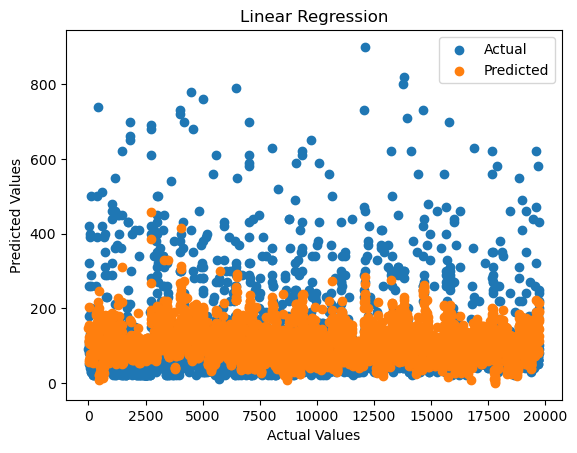

In [35]:
utility.plot_model(utility.model_training('Linear Regression',X_train,y_train),X_test,y_test,title="Linear Regression")

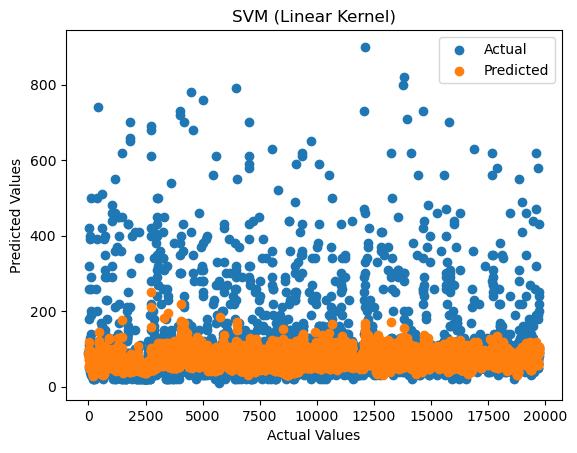

In [36]:
utility.plot_model(utility.model_training('SVM',X_train,y_train,params='linear'),X_test,y_test,title="SVM (Linear Kernel)")

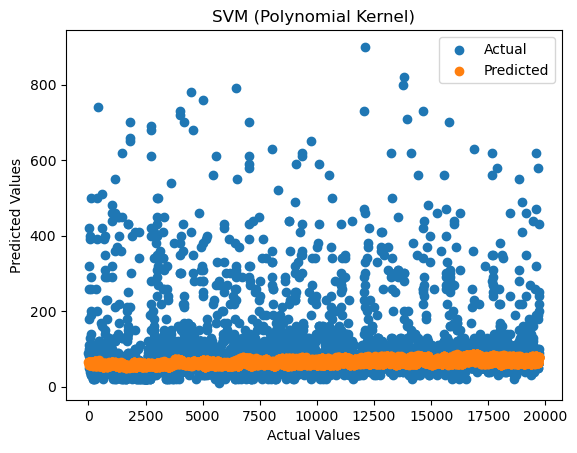

In [37]:
utility.plot_model(utility.model_training('SVM',X_train,y_train,params='poly'),X_test,y_test,title="SVM (Polynomial Kernel)")

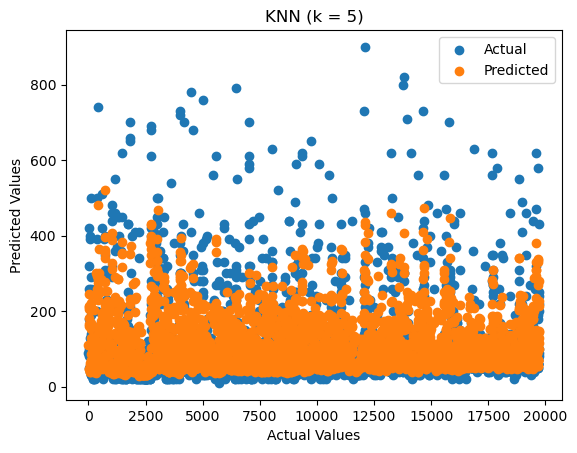

In [38]:
utility.plot_model(utility.model_training('KNN',X_train,y_train,params=5),X_test,y_test,title="KNN (k = 5)")

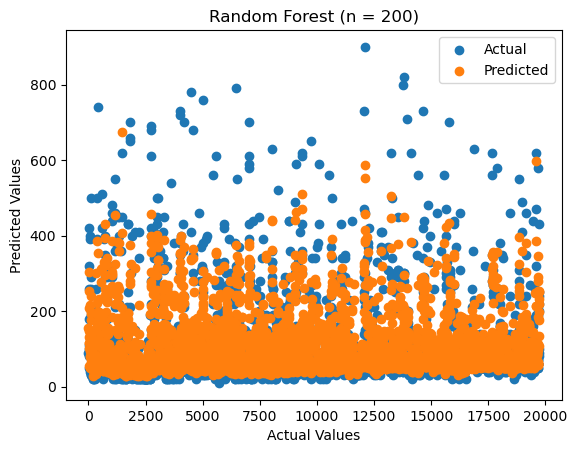

In [39]:
utility.plot_model(utility.model_training('Random Forest',X_train,y_train,params=200),X_test,y_test,title="Random Forest (n = 200)")

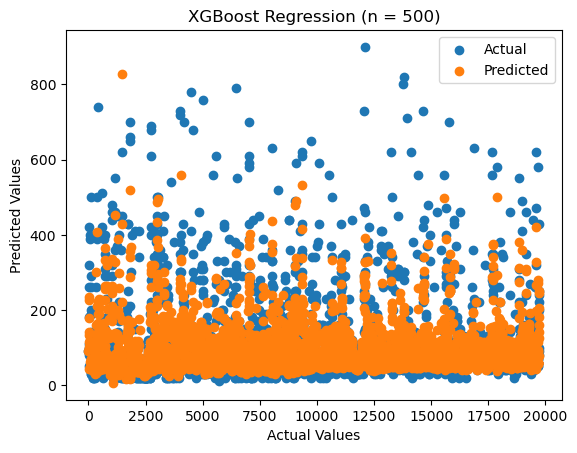

In [40]:
utility.plot_model(utility.model_training('XGBoost',X_train,y_train,params=['dart',500]),X_test,y_test,title="XGBoost Regression (n = 500)")

In [43]:
# We try standarization to see if it helps improve the performance. 
# After trying for all the models, we found out that only KNN had a performance boost due to standardization.
# So we have added it below.

# Standarize the variables
scale= StandardScaler()
X1 = scale.fit_transform(X) 

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

results_knn2 = pd.DataFrame(columns = ['Nearest neighbours','Mean Absolute Error','R2 Score'])

# 5 nearest neighbours
model = utility.model_training('KNN',X_train1,y_train1,params=5)
mae,r2_score = utility.test_model(model,X_test1,y_test1)
results_knn2 = pd.concat([pd.DataFrame([['5',mae,r2_score]], columns=results_knn2.columns), results_knn2], ignore_index=True)

# 10 nearest neighbours
model = utility.model_training('KNN',X_train1,y_train1,params=10)
mae,r2_score = utility.test_model(model,X_test1,y_test1)
results_knn2 = pd.concat([pd.DataFrame([['10',mae,r2_score]], columns=results_knn2.columns), results_knn2], ignore_index=True)

# 25 nearest neighbours
model = utility.model_training('KNN',X_train1,y_train1,params=25)
mae,r2_score = utility.test_model(model,X_test1,y_test1)
results_knn2 = pd.concat([pd.DataFrame([['25',mae,r2_score]], columns=results_knn2.columns), results_knn2], ignore_index=True)

# 50 nearest neighbours
model = utility.model_training('KNN',X_train1,y_train1,params=50)
mae,r2_score = utility.test_model(model,X_test1,y_test1)
results_knn2 = pd.concat([pd.DataFrame([['50',mae,r2_score]], columns=results_knn2.columns), results_knn2], ignore_index=True)

results_knn2

,Nearest neighbours,Mean Absolute Error,R2 Score
0,50,47.827819,0.231185
1,25,45.293134,0.287536
2,10,42.625032,0.340799
3,5,40.214847,0.374523


The comparison of performance of the various models and the analysis on why the models fail or succeed has been written in detail in our report.